<a href="https://colab.research.google.com/github/hinazargham/AIC-Quarter2-DeepLearning/blob/main/Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting house prices: a regression example**
Another common type of
machine-learning problem is regression, which consists of predicting a continuous
value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data; or predicting the time that a software project will take to
complete, given its specifications.


NOTE Don’t confuse regression and the algorithm logistic regression. Confusingly,
logistic regression isn’t a regression algorithm—it’s a classification
algorithm.

## **The Boston Housing Price dataset**
You’ll attempt to predict the median price of homes in a given Boston suburb in the
mid-1970s, given data points about the suburb at the time, such as the crime rate, the
local property tax rate, and so on. The dataset you’ll use has an interesting difference
from the two previous examples. It has relatively few data points: only **506**, split
between **404 training samples** and **102 test samples**. 

Each feature in the input data
(for example, the crime rate) has a different scale. For instance, some values are proportions,
which take values between 0 and 1; others take values between 1 and 12, others
between 0 and 100, and so on

### Loading Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

### Loading the Boston housing dataset

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
display(train_data.shape)
display(train_targets.shape)

(404, 13)

(404,)

In [ ]:
display(test_data.shape)
display(test_targets.shape)

(102, 13)

(102,)

Thus we have 404 training samples and 102 test samples, each with 13
numerical features, such as per capita crime rate, average number of rooms per dwelling,
accessibility to highways, and so on.


In [ ]:
display(train_data.ndim)
display(test_data.ndim)

2

2

The targets are the median values of owner-occupied homes, in thousands of
dollars:

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between 10,000 and 50,000 dollars. If that sounds cheap, remember
that this was the mid-1970s, and these prices aren’t adjusted for inflation.

In [ ]:
print('Data :', train_data[0])
print('Targets :', train_targets[0])


Data : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Targets : 15.2


In [ ]:
test_data

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [ ]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [ ]:
print("Data", test_data[0])
print("Target",test_targets[0])


Data [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
Target 7.2


### Preparing the data
It would be problematic to feed into a neural network values that all take wildly different
ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation. This is easily done in Numpy.

### Normalizing the data

In [ ]:
mean = train_data.mean(axis=0) # column 
# mean and standard deviation  only find from training dataset
train_data -= mean #train_data = train_data - mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
train_data[0] # all values now between 0 and 1 range

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:
test_data[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

### Building your network
Because so few samples are available, you’ll use a very small network with two hidden
layers, each with 64 units. In general, the less training data you have, the worse overfitting
will be, and using a small network is one way to mitigate overfitting.

#### Model definition

In [ ]:
 # making it function
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) # input is no of rows and 
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

The network ends with a single unit and no activation (it will be a linear layer). This is
a typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). Applying an activation function would constrain the range the output
can take; for instance, if you applied a sigmoid activation function to the last layer,
the network could only learn to predict values between 0 and 1. Here, because the last
layer is purely linear, the network is free to learn to predict values in any range.

Note that you compile the network with the mse loss function—mean squared error,
the square of the difference between the predictions and the targets. This is a widely
used loss function for regression problems.
You’re also monitoring a new metric during training: mean absolute error (MAE). It’s
the absolute value of the difference between the predictions and the targets. For
instance, an MAE of 0.5 on this problem would mean your predictions are off by $500
on average.

## Validating your approach using K-fold validation
To evaluate your network while you keep adjusting its parameters (such as the number
of epochs used for training), you could split the data into a training set and a validation
set, as you did in the previous examples. But because you have so few data points,
the validation set would end up being very small (for instance, about 100 examples).
As a consequence, the validation scores might change a lot depending on which data
points you chose to use for validation and which you chose for training: the validation
scores might have a high variance with regard to the validation split. This would prevent
you from reliably evaluating your model.
The best practice in such situations is to use K-fold cross-validation (see figure 3.11).
It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating
K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained. In terms of code, this is straightforward.

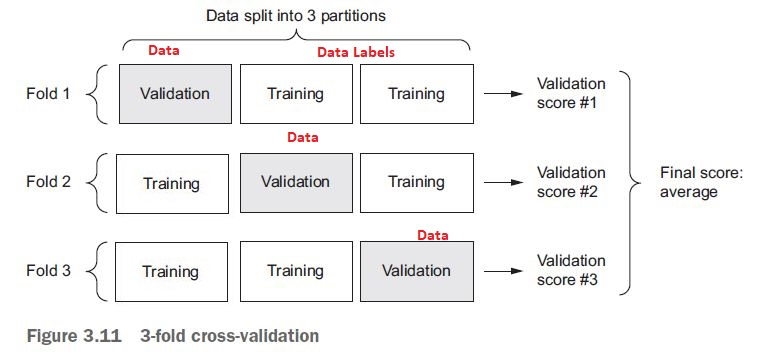

In [ ]:
k = 4
num_val_samples = len(train_data) // k # return only integer number
num_epochs = 100

In [ ]:
k = 4
num_val_samples = len(train_data) // k # return only integer number
print("Samples",num_val_samples)
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  # print("Val data", val_data.shape)

  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # print("Val Targets",val_targets.shape)

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) 
  * num_val_samples:]],axis=0)
  # print("Partial Train Data", partial_train_data.shape)

  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) 
  * num_val_samples:]],axis=0)
  # print("Partial Train Targets",partial_train_targets.shape)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)


Samples 101
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
print('All fold Validation Errors:' ,all_scores)
print('Mean of All fold Validation Errors:' ,np.mean(all_scores))
print('Average MAE History:' ,average_mae_history)

All fold Validation Errors: [2.008898973464966, 2.461240291595459, 2.482365131378174, 2.313250780105591]
Mean of All fold Validation Errors: 2.3164387941360474
Average MAE History: [11.065092325210571, 3.78452205657959, 3.0975319743156433, 2.790713310241699, 2.6059582829475403, 2.4828365445137024, 2.4238919615745544, 2.338188111782074, 2.2756219506263733, 2.2449870705604553, 2.1955092549324036, 2.1839078068733215, 2.155184507369995, 2.0905954241752625, 2.066299468278885, 2.0553641319274902, 2.0511049926280975, 2.001091957092285, 1.9892418682575226, 1.9661008715629578, 1.949738770723343, 1.9558120965957642, 1.9288679957389832, 1.9235486388206482, 1.8875293731689453, 1.8933889269828796, 1.8568505346775055, 1.8494171798229218, 1.819044440984726, 1.8145215511322021, 1.7801474034786224, 1.8145136535167694, 1.80103600025177, 1.7737879753112793, 1.7464619576931, 1.764350563287735, 1.750222533941269, 1.7296237349510193, 1.7281260788440704, 1.675099492073059, 1.7095564007759094, 1.6791757643222

In [ ]:
[len(x) for x in all_mae_histories ]

[100, 100, 100, 100]

### Plotting validation scores

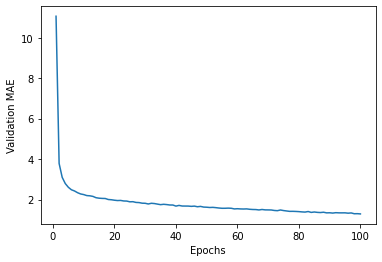

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Plotting validation scores, excluding the first 10 data points

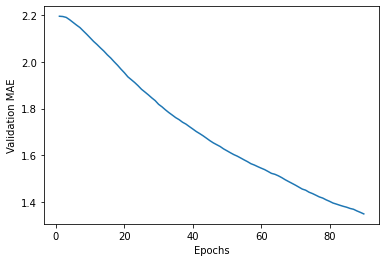

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training and Validating the final model on Complete Dataset

In [ ]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 18.4859 - mae: 2.9076
2.907611608505249
